### Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

### Loading Dataset

In [2]:
# load the data from csv file to Pandas DataFrame
df = pd.read_csv('Train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Expolatory Data Analysis(EDA)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Duplicate Records

In [8]:
#Find the number duplicate record
print('Number of duplicate Record:', df.duplicated().sum())

Number of duplicate Record: 0


#### Missing values

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--> There is misssing value in Age, Cabin abd Embarked.

#### Handling Missing Values

In [10]:
#Drop Cabin Column
df = df.drop(columns='Cabin', axis=1)

In [11]:
#Drop Fare Column
df = df.drop(columns='Fare', axis=1)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S


In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S


In [14]:
# replacing the missing values in "Age" column with mean value
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [16]:
print(df['Embarked'].mode()[0])

S


In [17]:
# replacing the missing values in "Embarked" column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64

In [19]:
df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [20]:
df['Embarked'] = df['Embarked'].map( {'S':0,'C':1,'Q':2}).astype(int)

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,0


### Data Visualization

In [22]:
# finding the number of people survived and not survived
survival_counts = df['Survived'].value_counts()
print(survival_counts)

Survived
0    549
1    342
Name: count, dtype: int64


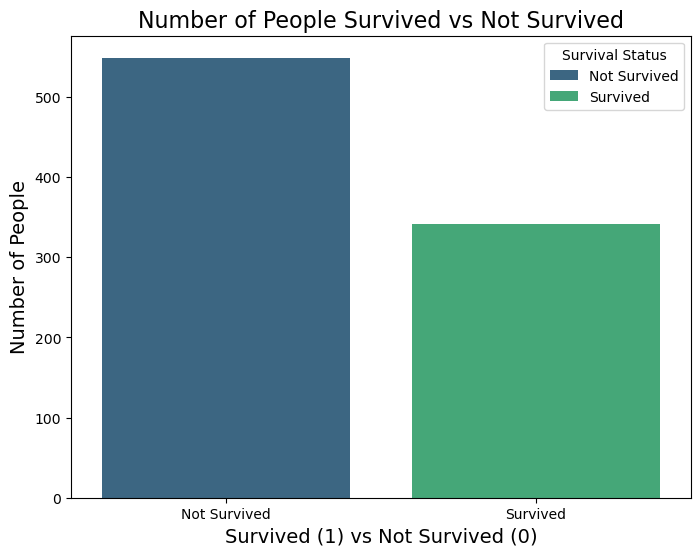

In [23]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')

# Adding title and labels
plt.title('Number of People Survived vs Not Survived', fontsize=16)
plt.xlabel('Survived (1) vs Not Survived (0)', fontsize=14)
plt.ylabel('Number of People', fontsize=14)

# Adding legends
survived_labels = ['Not Survived', 'Survived']  # 0 is Not Survived and 1 is Survived
ax.set_xticklabels(survived_labels)

# Show the plot
plt.legend(handles=ax.patches, labels=survived_labels, title='Survival Status')
plt.show()

In [24]:
# finding the number of people survived and not survived
gender_survival_counts = df['Sex'].value_counts()
print(gender_survival_counts)

Sex
0    577
1    314
Name: count, dtype: int64


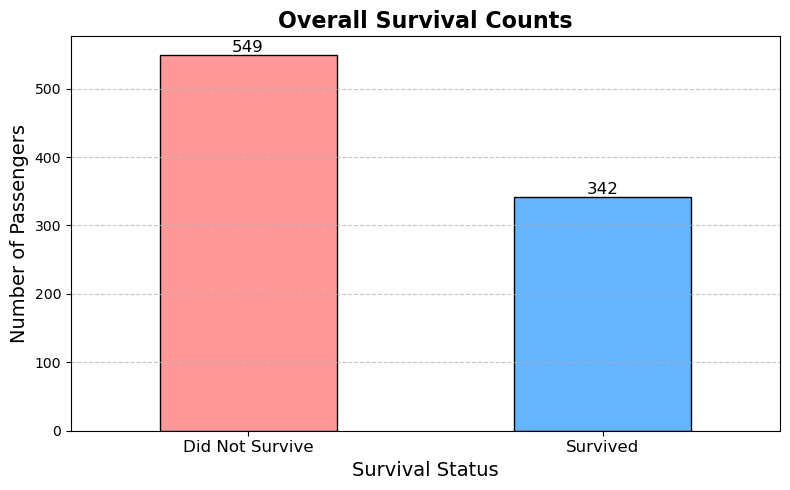

In [25]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
survival_counts.plot(kind='bar', ax=ax, color=['#ff9999', '#66b3ff'], edgecolor='black')

# Adding Titles and Labels
ax.set_title('Overall Survival Counts', fontsize=16, fontweight='bold')
ax.set_xlabel('Survival Status', fontsize=14)
ax.set_ylabel('Number of Passengers', fontsize=14)
ax.set_xticklabels(['Did Not Survive', 'Survived'], rotation=0, fontsize=12)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Did Not Survive', 'Survived'], rotation=0, fontsize=12)

# Adding Grid Lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adding Data Labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.tight_layout()

# Show the plot
plt.show()

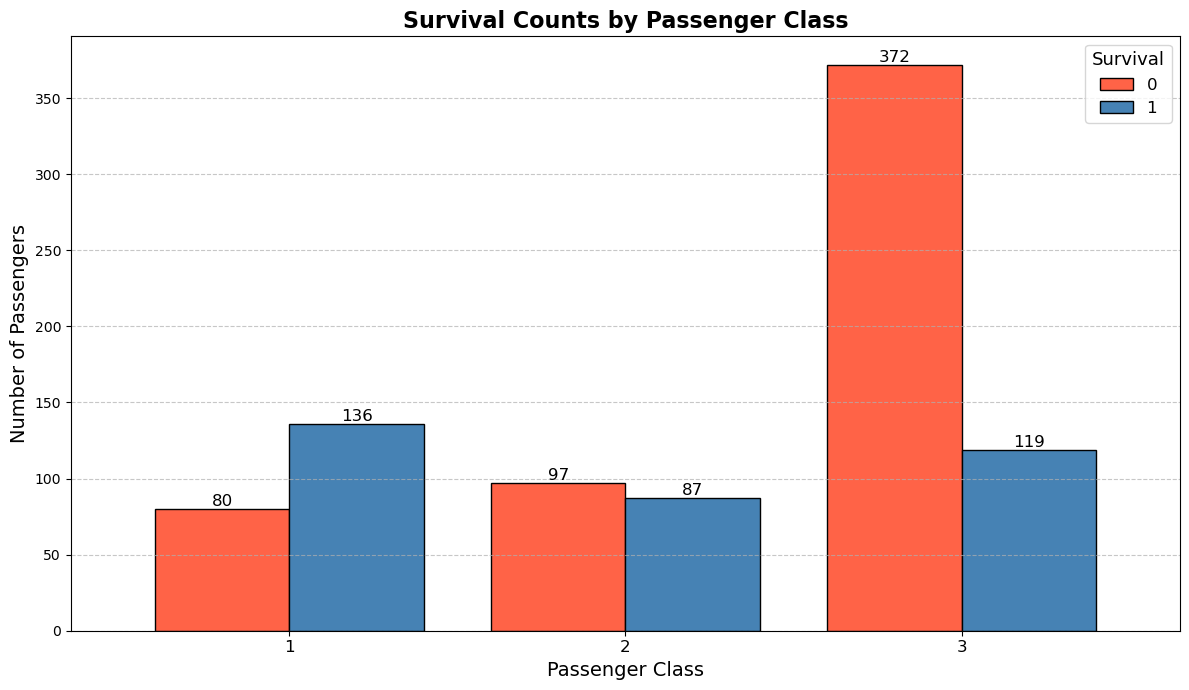

In [26]:
# Group by 'Pclass' and 'Survived' and count the number of occurrences
pclass_survival_counts = df.groupby(['Pclass', 'Survived']).size().unstack(fill_value=0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))
pclass_survival_counts.plot(kind='bar', ax=ax, color=['#ff6347', '#4682b4'], edgecolor='black', width=0.8)

# Adding Titles and Labels
ax.set_title('Survival Counts by Passenger Class', fontsize=16, fontweight='bold')
ax.set_xlabel('Passenger Class', fontsize=14)
ax.set_ylabel('Number of Passengers', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)
ax.legend(title='Survival', title_fontsize='13', fontsize='12', loc='upper right')

# Adding Grid Lines
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Adding Data Labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.tight_layout()

# Show the plot
plt.show()


In [27]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [28]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,22.000000,1,0,0
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,0
4,3,0,35.000000,0,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,0,0,0
887,1,1,19.000000,0,0,0
888,3,1,29.699118,1,2,0
889,1,0,26.000000,0,0,1


In [29]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Splitting Data into testing and training

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


### Model Training

#### Logistic Regression

In [32]:
model = LogisticRegression()

In [33]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

#### Accuracy Score

In [34]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [35]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of Logistic Regression on training data : ', training_data_accuracy)

Accuracy score of Logistic Regression on training data :  0.8117977528089888


In [36]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [37]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of Logistic Regression on test data : ', test_data_accuracy)

Accuracy score of Logistic Regression on test data :  0.7877094972067039


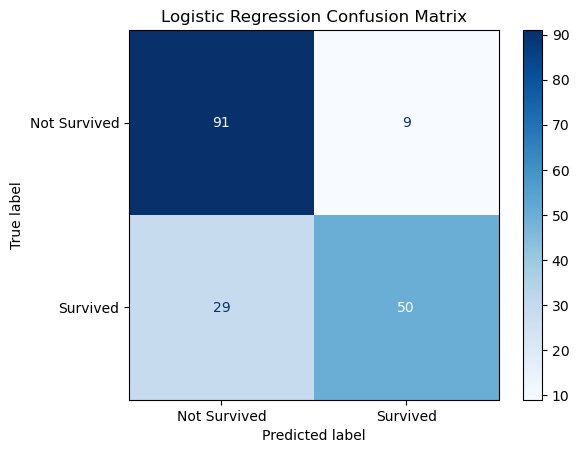

1

In [49]:
conf_matrix_lr = confusion_matrix(Y_test, X_test_prediction)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=['Not Survived', 'Survived'])

# Plotting the confusion matrix
disp_lr.plot(cmap=plt.cm.Blues)

# Adding the title
plt.title('Logistic Regression Confusion Matrix')

# Show the plot
plt.show()



#### Decision Tree

In [38]:
# Initialize and train the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=2)
decision_tree_model.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=2)

#### Accuracy Score

In [39]:
# Accuracy on training data
X_train_dt_prediction = decision_tree_model.predict(X_train)
training_data_accuracy_dt = accuracy_score(Y_train, X_train_dt_prediction)
print('Accuracy score of Decision Tree on training data : ', training_data_accuracy_dt)


Accuracy score of Decision Tree on training data :  0.9424157303370787


In [40]:
# Accuracy on test data
X_test_dt_prediction = decision_tree_model.predict(X_test)
test_data_accuracy_dt = accuracy_score(Y_test, X_test_dt_prediction)
print('Accuracy score of Decision Tree on test data : ', test_data_accuracy_dt)

Accuracy score of Decision Tree on test data :  0.7653631284916201


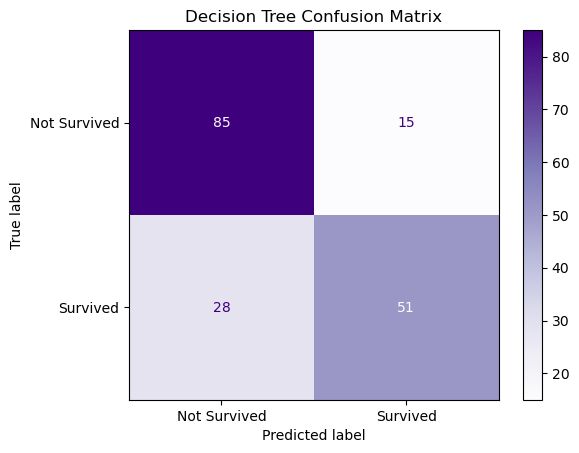

In [50]:
# Train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Make predictions
X_test_prediction_dt = decision_tree.predict(X_test)

# Compute confusion matrix
conf_matrix_dt = confusion_matrix(Y_test, X_test_prediction_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix 
disp_dt.plot(cmap=plt.cm.Purples)

# Add title
plt.title('Decision Tree Confusion Matrix')

# Show plot
plt.show()


#### Rondom Forest

In [41]:
# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=2)
random_forest_model.fit(X_train, Y_train)

RandomForestClassifier(random_state=2)

#### Accuracy Score

In [53]:
# Accuracy on training data
X_train_rf_prediction = random_forest_model.predict(X_train)
training_data_accuracy_rf = accuracy_score(Y_train, X_train_rf_prediction)
print('Accuracy score of Random Forest on training data : ', training_data_accuracy_rf)


Accuracy score of Random Forest on training data :  0.9424157303370787


In [57]:
# Accuracy on test data
X_train_rf_prediction = random_forest_model.predict(X_train)
test_data_accuracy_rf = accuracy_score(Y_test, X_test_rf_prediction)
print('Accuracy score of Random Forest on test data : ', test_data_accuracy_rf)


Accuracy score of Random Forest on test data :  0.7821229050279329


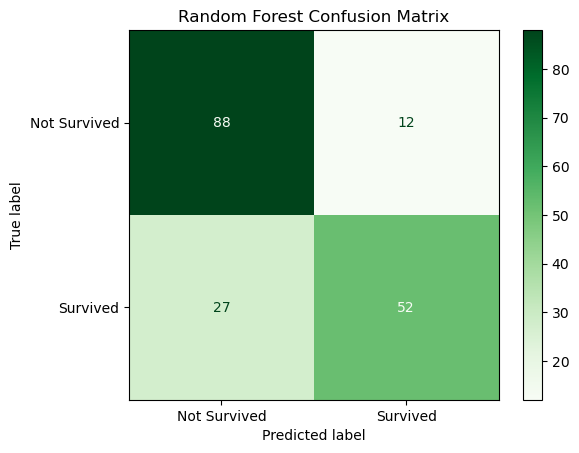

In [58]:
# Train the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

# Make predictions
X_test_prediction_rf = random_forest.predict(X_test)

# Compute confusion matrix
conf_matrix_rf = confusion_matrix(Y_test, X_test_prediction_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=['Not Survived', 'Survived'])

# Plot confusion matrix 
disp_rf.plot(cmap=plt.cm.Greens)

# Add title
plt.title('Random Forest Confusion Matrix')

# Show plot
plt.show()


### Best performing model

In [44]:
# Print Accuracy Scores for all models
print("\nModel Comparison:")
print(f"Logistic Regression Test Accuracy: {test_data_accuracy:.2f}")
print(f"Decision Tree Test Accuracy: {test_data_accuracy_dt:.2f}")
print(f"Random Forest Test Accuracy: {test_data_accuracy_rf:.2f}")



Model Comparison:
Logistic Regression Test Accuracy: 0.79
Decision Tree Test Accuracy: 0.77
Random Forest Test Accuracy: 0.78


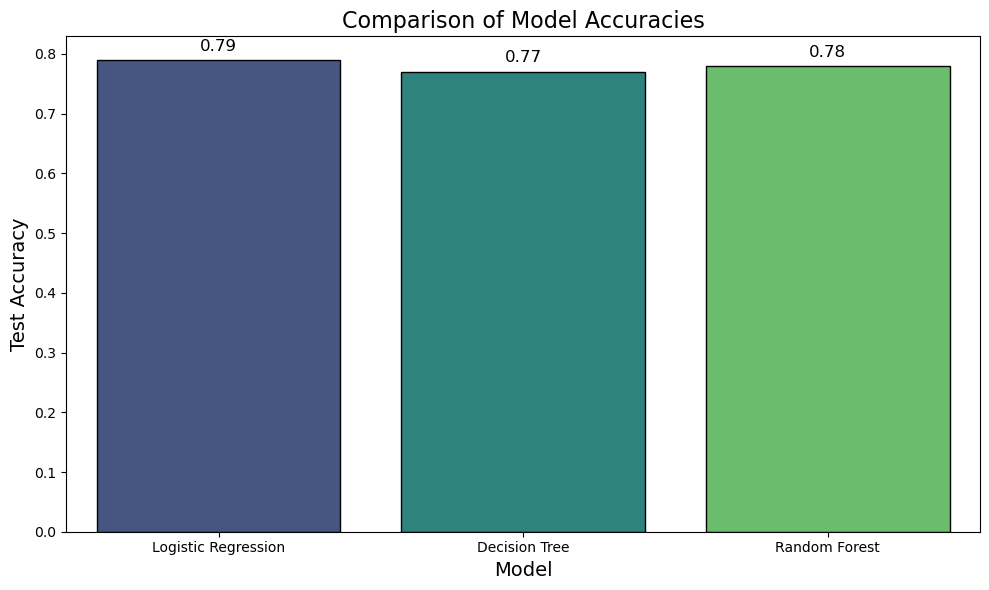

In [45]:
# Model names and their corresponding test accuracies
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracies = [0.79, 0.77, 0.78]

# Creating the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=models, y=accuracies, palette='viridis', edgecolor='black')

# Adding title and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)

# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()
